<a href="https://colab.research.google.com/github/heathlikethecandybar/phase_5/blob/main/phase_5_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting Diabetes

#Overview

##Business Problem

An insurance company wants to develop a predictive model to assess the risk of diabetes among their policyholders based on a limited set of available data points. By accurately identifying individuals at high risk of developing diabetes, the company aims to take proactive measures to reduce healthcare costs and improve the overall health outcomes of their customers.

The challenge for the company is to build a robust and accurate predictive model that can handle the complexity and non-linear relationships between the available data points and the risk of developing diabetes. The model should consider factors such as age, gender, BMI, hypertension status, heart disease history, smoking history, HbA1c level, and blood glucose level. We will use a classification model to predict diabetes within the population of interest.

My background and work history has been in healthcare which makes this an interesting problem for me.  Being able to accurately predict risk within a population and provide resources and preventive measures are important now more than ever.

##Evaluation Metrics

Recall (Sensitivity) calculates the proportion of correctly predicted positive instances (true positives) out of the total actual positive instances (true positives + false negatives). It focuses on the ability of the model to identify all positive instances, which, in this case, would be individuals with diabetes. Maximizing recall helps ensure that individuals who are at risk of or have diabetes are correctly identified, enabling appropriate interventions and healthcare management.

By emphasizing recall, you aim to minimize false negatives and avoid missing individuals who need early interventions or treatments. However, it's important to note that focusing on recall might lead to a higher number of false positives. Therefore, it's essential to strike a balance that aligns with the specific goals and requirements of your business context.

## About the Data
The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

#Data acquisition

##Importing our packages for EDA

In [1]:
#importing necessary packages for light EDA
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

##Setting up our Kaggle data file pull

In [2]:
#mounting google drive for easy access to our downloaded kaggle data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#making directory for kaggle
! mkdir ~/.kaggle

In [7]:
#copying my json file to new directory
! cp /content/drive/MyDrive/Flatiron/Capstone/kaggle/kaggle.json ~/.kaggle/kaggle.json

In [8]:
#changing access to our kaggle file
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
#downloading our kaggle dataset
! kaggle datasets download iammustafatz/diabetes-prediction-dataset

  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 176MB/s]


In [10]:
#unzipping our file
!unzip -q /content/drive/MyDrive/Flatiron/Capstone/diabetes_prediction/diabetes-prediction-dataset.zip -d /content/Dataset

##Importing data

In [11]:
#attaching our csv to a pandas dataframe
df = pd.read_csv('/content/Dataset/diabetes_prediction_dataset.csv')

#Exploratory Data Analysis

In [12]:
#quick look at our data
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [13]:
#loop through each column in the df
for column in df.columns:
    distinct_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Distinct Values: {distinct_values}")
    print("--------------------------")

Column: gender
Distinct Values: ['Female' 'Male' 'Other']
--------------------------
Column: age
Distinct Values: [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
--------------------------
Column: hypertension
Distinct Values: [0 1]
--------------------------
Column: heart_disease
Distinct Values: [1 0]
--------------------------
Column: smoking_history
Distinct Values: ['never' 'No Info' 'current' 'former' 'ever' 'not current']
---

Looks like we will have 7 independent variables, and 1 dependent variable (target) which is our diabetes column.  Hypertension, heart disease, and smoking history are categorical values.  In which we may need to one encode.

In [14]:
#taking a look at our data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [15]:
#look for missing records
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

No missing records which is good.  100k records, which is a good sized data set.  I wish there was more interesting columns, however, these are the core tenants for predicting diabetes.

In [16]:
#summary stats
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


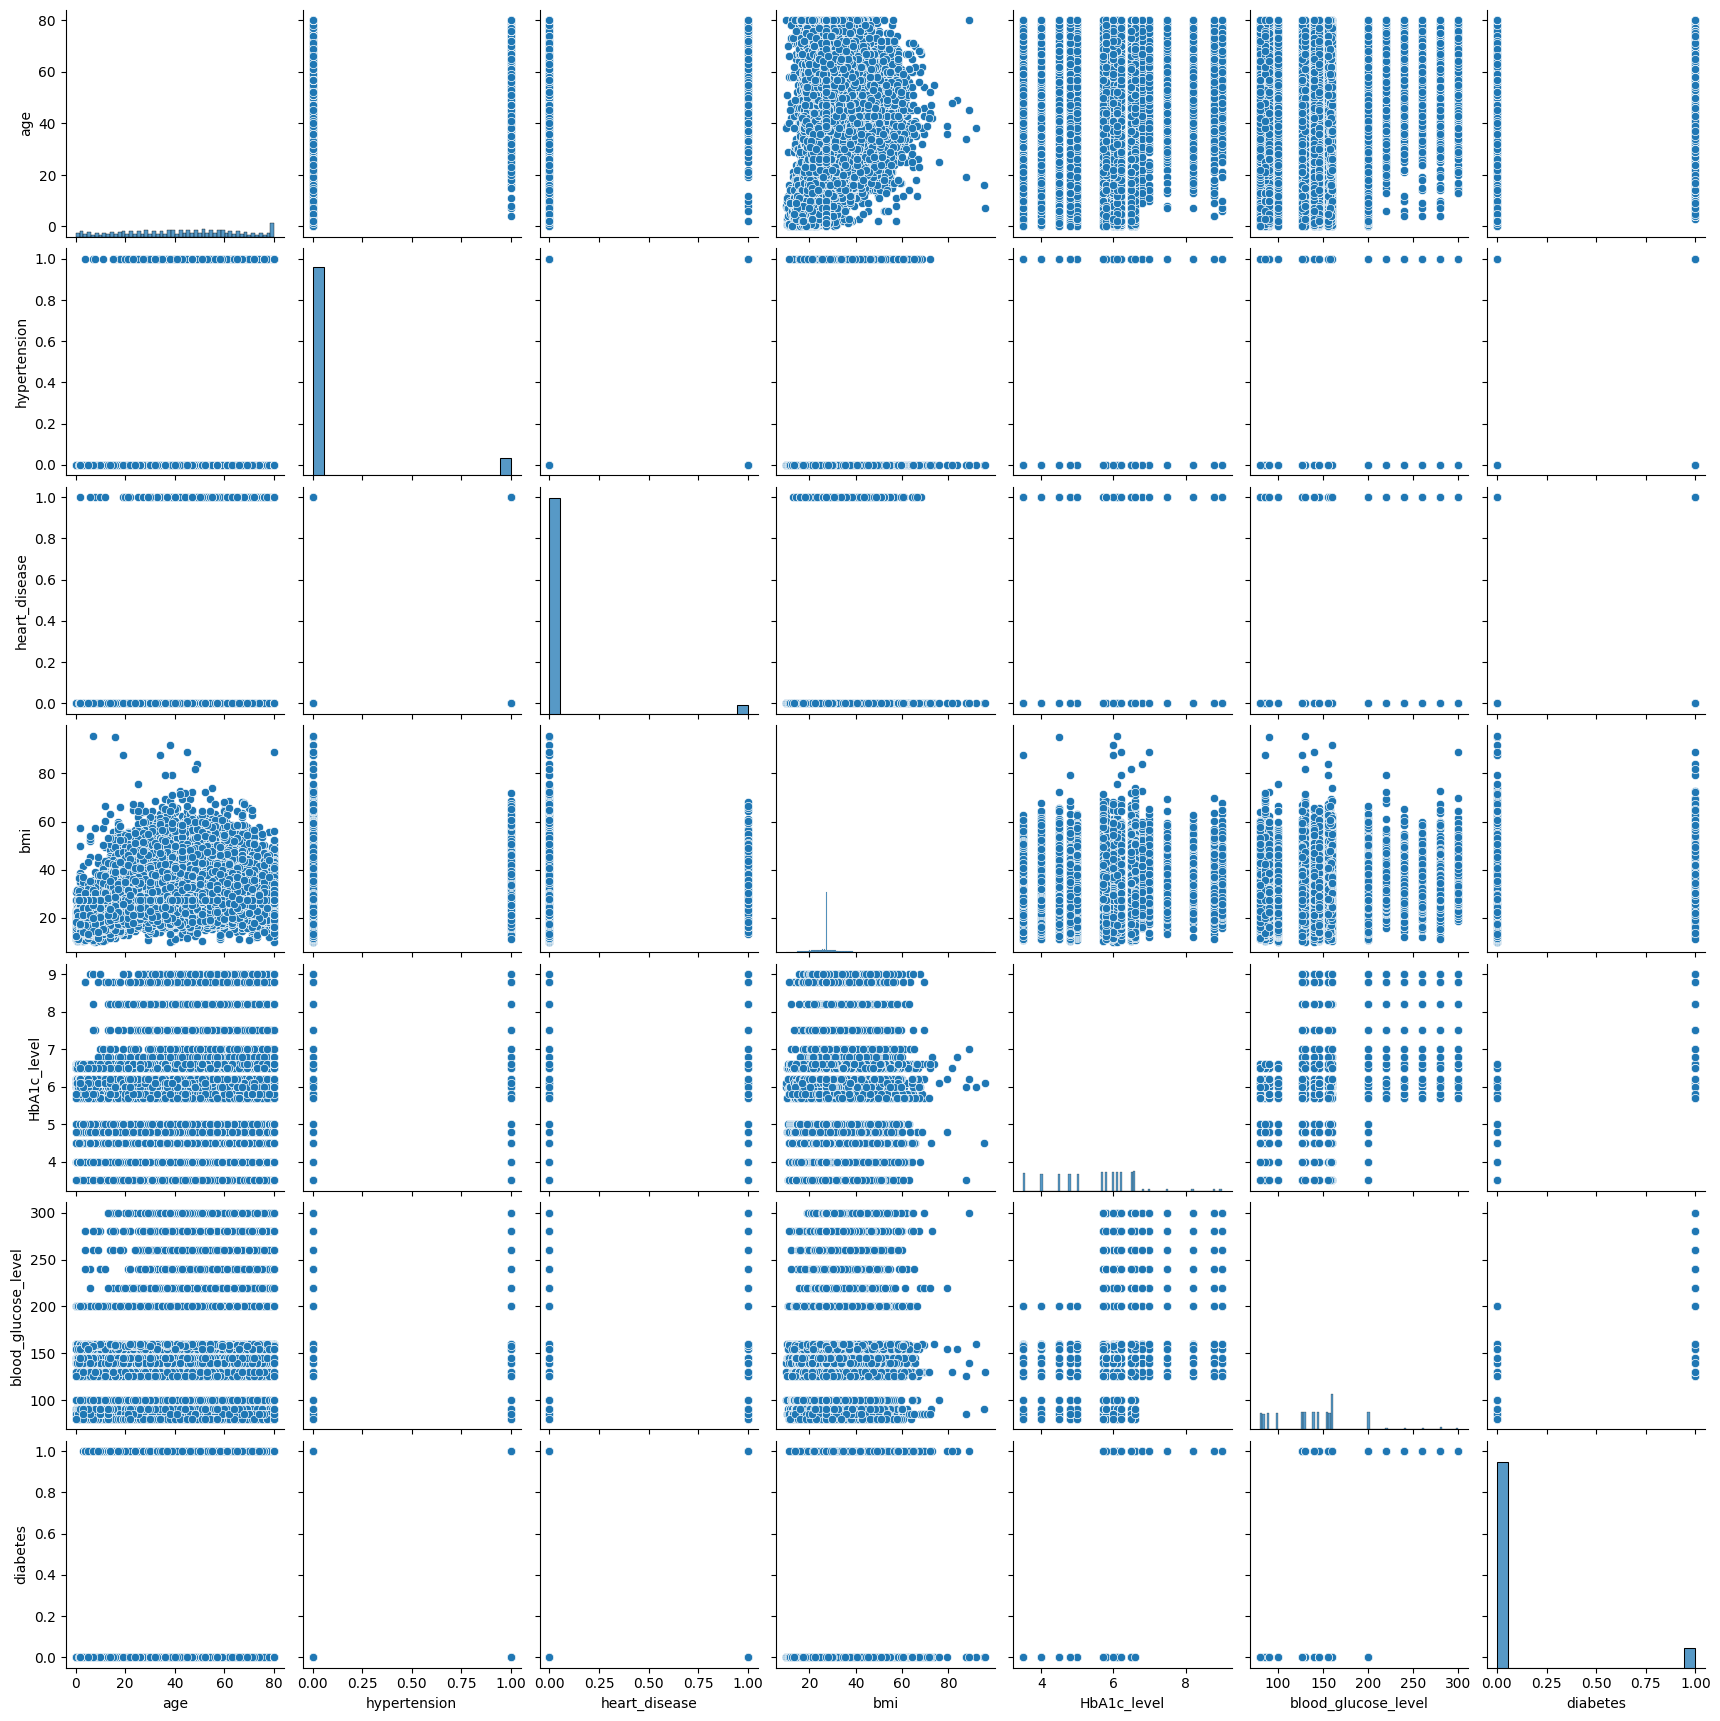

In [17]:
#distribution by column
sns.pairplot(df)

Looks like our target is imbalanced, so we will most likely be using an oversampling method such as smote to deal with the imbalance.  This seems to be the case even with some of our independent variables.  Which makes sense when you think about the distribution of the population with heart disease, hypertension, and diabetes.

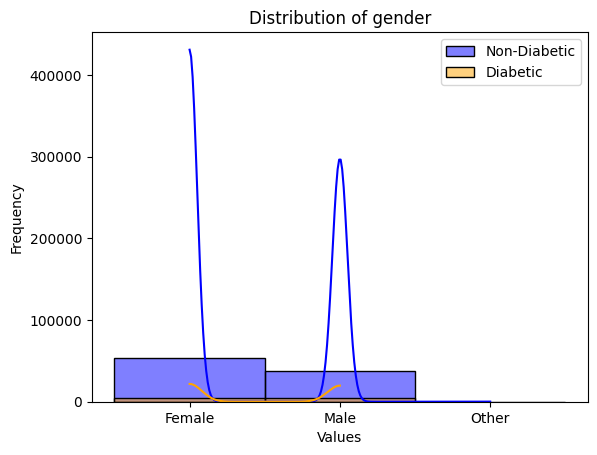

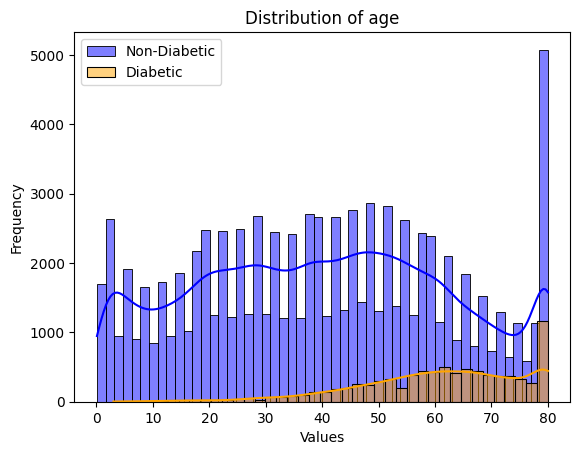

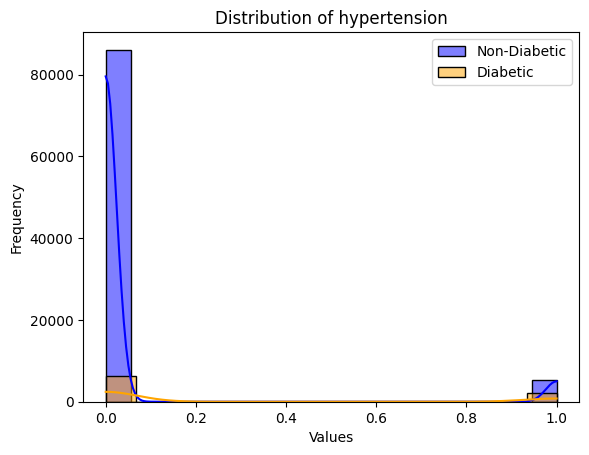

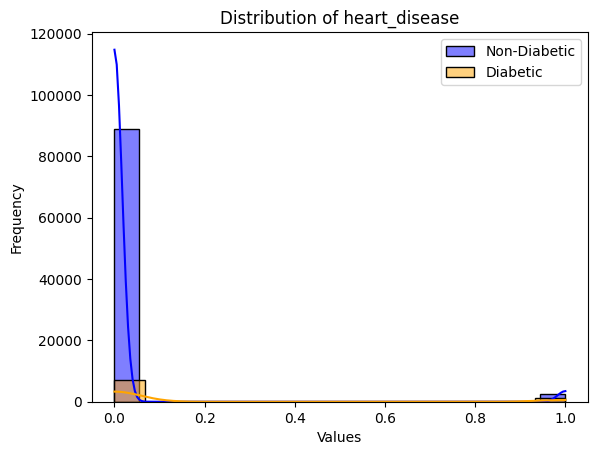

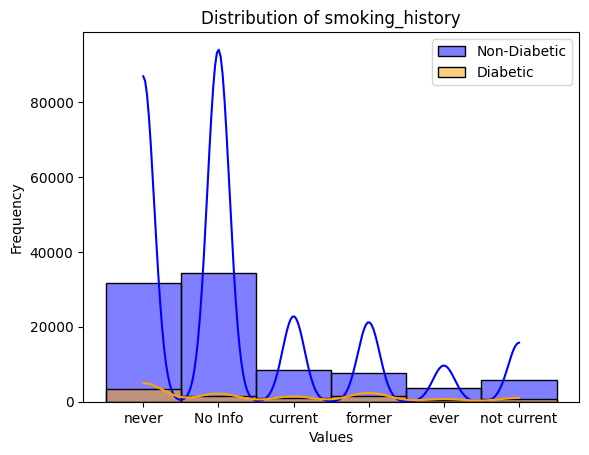

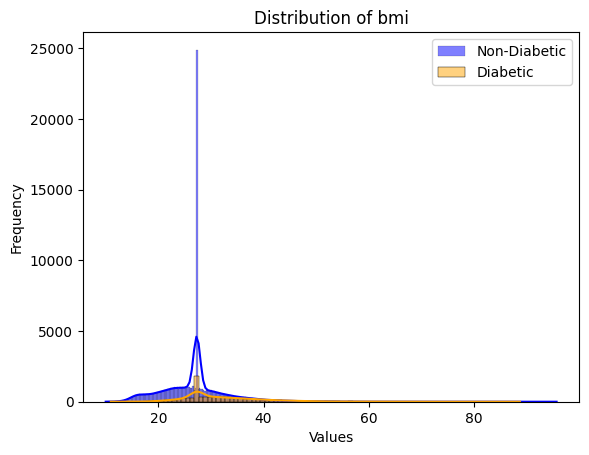

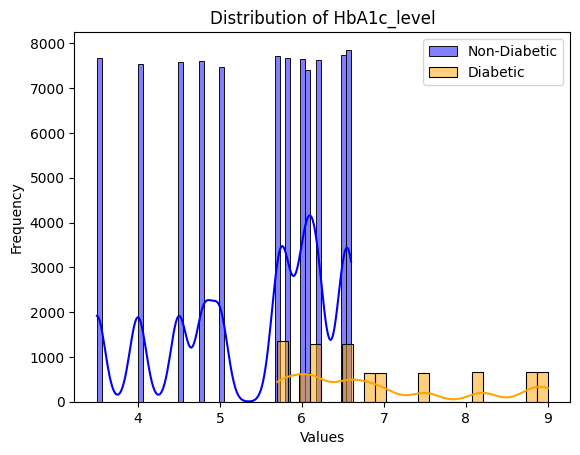

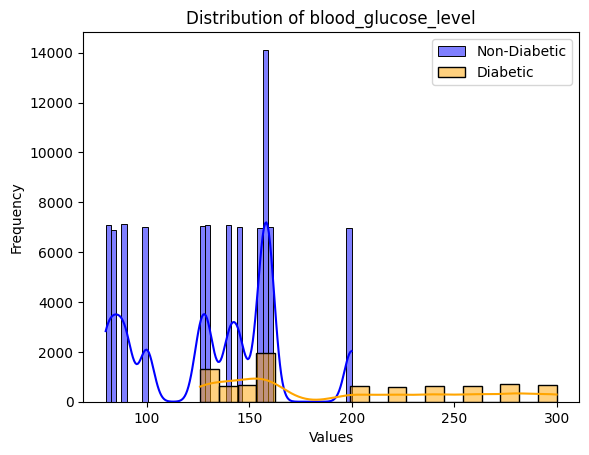

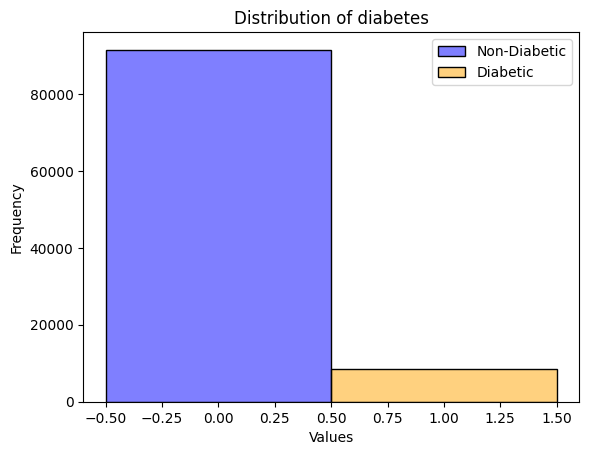

In [21]:
# Get the list of column names
columns = df.columns

# Create individual distribution plots for each column based on the binary column
for column in columns:
    plt.figure()  # Create a new figure for each plot

    # Plot the distribution based on the binary column
    sns.histplot(df[df['diabetes'] == 0][column], kde=True, color='blue', label='Non-Diabetic')
    sns.histplot(df[df['diabetes'] == 1][column], kde=True, color='orange', label='Diabetic')

    plt.title(f'Distribution of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

    # Display the legend
    plt.legend()

# Display the plots
plt.show()

<ipython-input-28-a87e47d0ed62>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr();


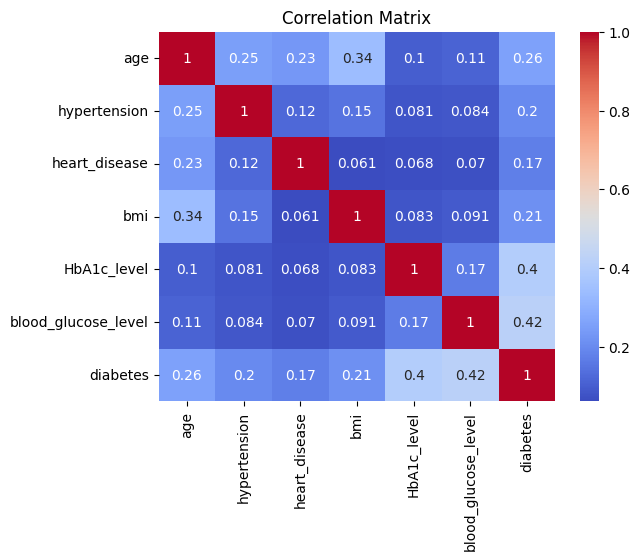

In [28]:
# Compute the correlation matrix
correlation_matrix = df.corr();

# Create a correlation matrix heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm');

# Set plot title
plt.title('Correlation Matrix');

# Display the plot
plt.show();

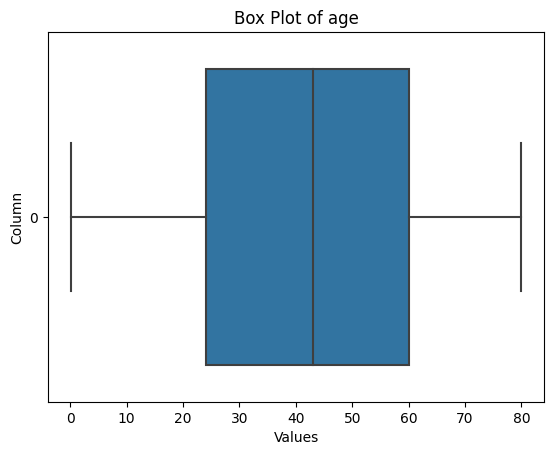

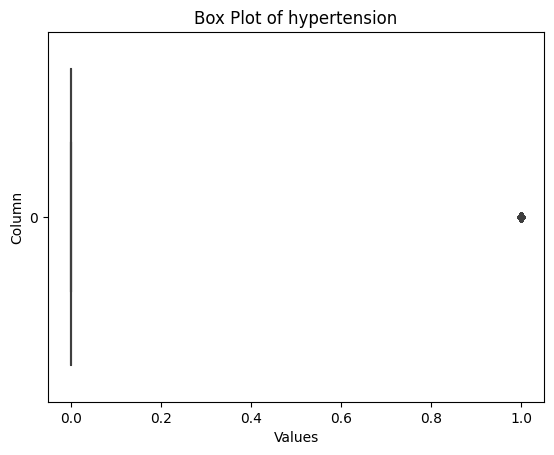

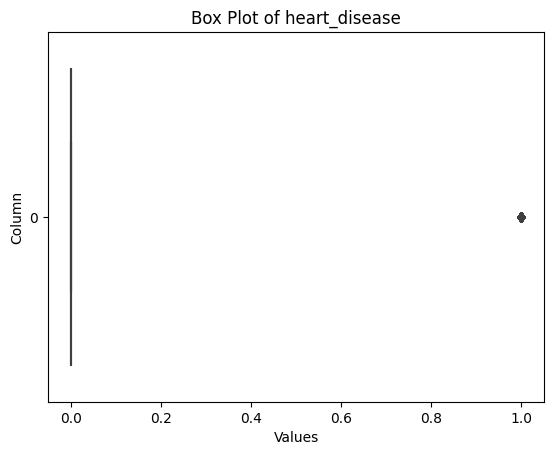

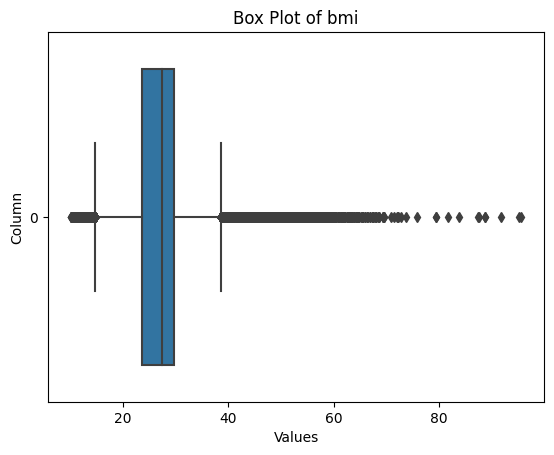

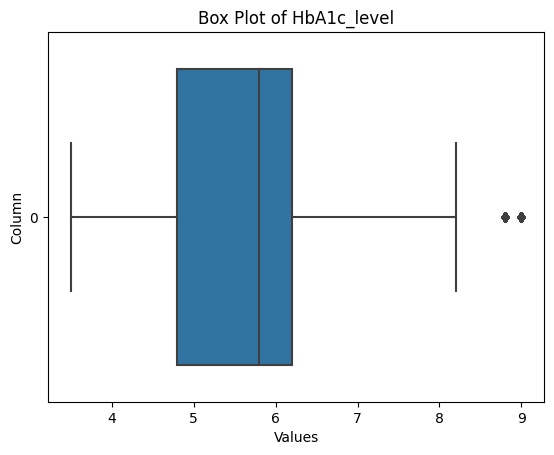

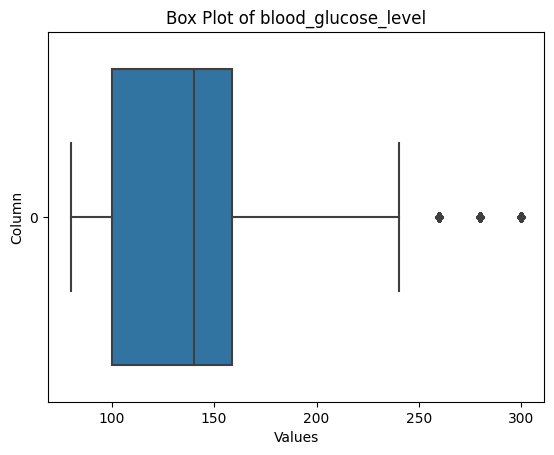

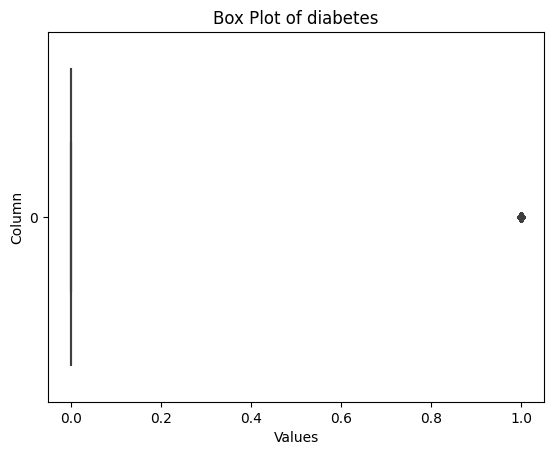

In [30]:
# Select numeric columns only
numeric_columns = df.select_dtypes(include='number')

# Create individual horizontal box plots for each numeric column
for column in numeric_columns.columns:
    plt.figure()  # Create a new figure for each plot
    sns.boxplot(data=numeric_columns[column], orient='h')
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Values')
    plt.ylabel('Column')

# Display the plots
plt.show()